# Import modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import missingno

# Initialize dataset

In [3]:
df = pd.read_csv("BankChurners.csv")

# Show dataset

In [4]:
# Remove Unecessary Column
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Rename Column

## Before

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## After

In [6]:
df_column_renamed = df.rename(columns = {'CLIENTNUM' : 'client_num',
                                         'Attrition_Flag' : 'attrition_flag',
                                         'Customer_Age' : 'customer_age',
                                         'Gender' : 'gender',
                                         'Dependent_count' : 'dependent_count',
                                         'Education_Level' : 'education_level',
                                         'Marital_Status' : 'marital_status',
                                         'Income_Category' : 'income_category',
                                         'Card_Category' : 'card_category',
                                         'Months_on_book' : 'months_on_book',
                                         'Total_Relationship_Count' : 'total_products_relationship',
                                         'Months_Inactive_12_mon' : 'months_inactive',
                                         'Contacts_Count_12_mon' : 'contacts_count',
                                         'Credit_Limit' : 'credit_limit',
                                         'Total_Revolving_Bal' : 'total_revolving_balance',
                                         'Avg_Open_To_Buy' : 'avg_open_to_buy',
                                         'Total_Amt_Chng_Q4_Q1' : 'total_transaction_amount_change',
                                         'Total_Trans_Amt' : 'total_transaction_amount',
                                         'Total_Trans_Ct' : 'total_transaction_count',
                                         'Total_Ct_Chng_Q4_Q1' : 'total_transaction_count_changes',
                                         'Avg_Utilization_Ratio' : 'average_utilization_ratio'
                                        })

In [7]:
df_column_renamed.head()

,client_num,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_products_relationship,months_inactive,contacts_count,credit_limit,total_revolving_balance,avg_open_to_buy,total_transaction_amount_change,total_transaction_amount,total_transaction_count,total_transaction_count_changes,average_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Data Cleaning

## Check Duplicate

In [8]:
df_column_renamed[df_column_renamed.duplicated()].sum()

client_num                         0.0
attrition_flag                     0.0
customer_age                       0.0
gender                             0.0
dependent_count                    0.0
education_level                    0.0
marital_status                     0.0
income_category                    0.0
card_category                      0.0
months_on_book                     0.0
total_products_relationship        0.0
months_inactive                    0.0
contacts_count                     0.0
credit_limit                       0.0
total_revolving_balance            0.0
avg_open_to_buy                    0.0
total_transaction_amount_change    0.0
total_transaction_amount           0.0
total_transaction_count            0.0
total_transaction_count_changes    0.0
average_utilization_ratio          0.0
dtype: float64

## Check Missing Data

In [8]:
df_column_renamed.isnull().sum()

client_num                         0
attrition_flag                     0
customer_age                       0
gender                             0
dependent_count                    0
education_level                    0
marital_status                     0
income_category                    0
card_category                      0
months_on_book                     0
total_products_relationship        0
months_inactive                    0
contacts_count                     0
credit_limit                       0
total_revolving_balance            0
avg_open_to_buy                    0
total_transaction_amount_change    0
total_transaction_amount           0
total_transaction_count            0
total_transaction_count_changes    0
average_utilization_ratio          0
dtype: int64

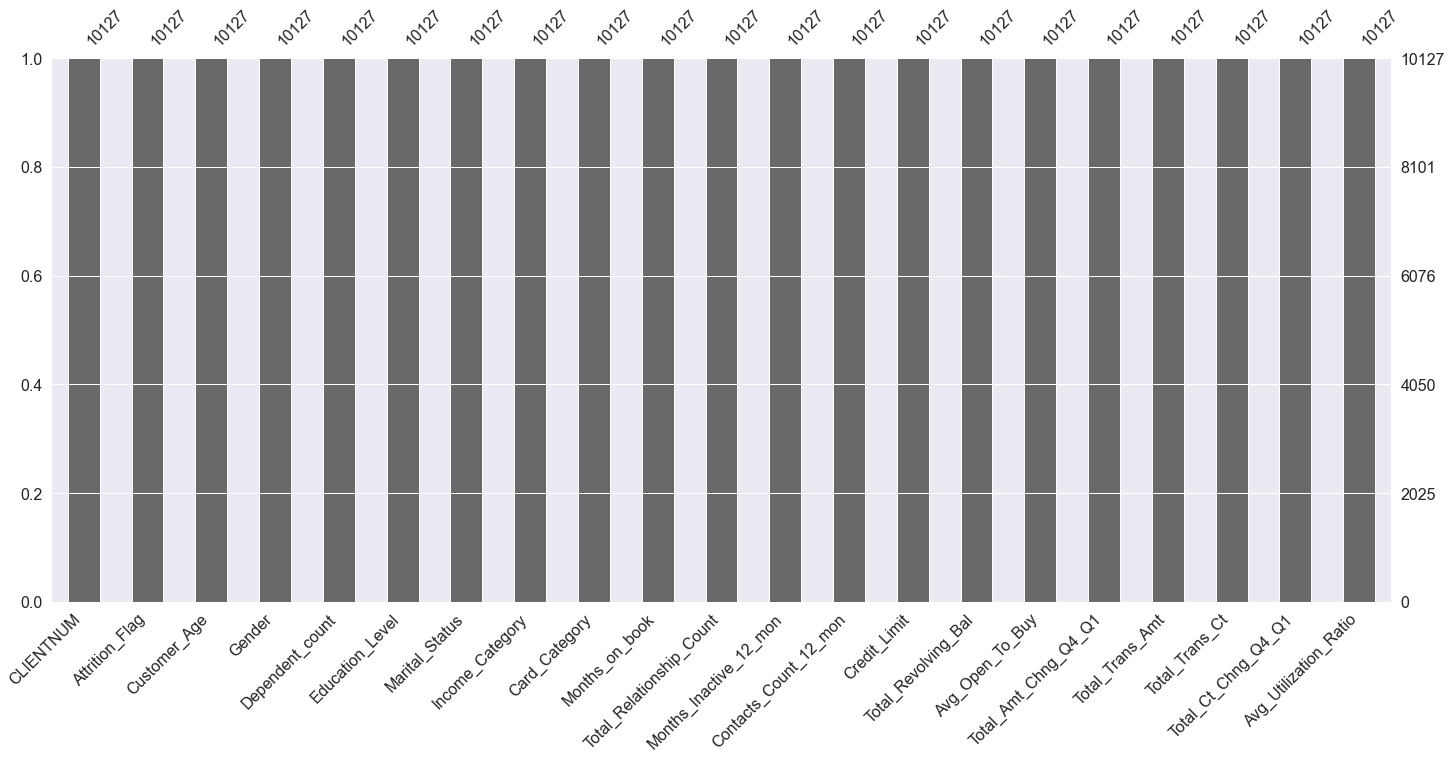

In [9]:
missingno.bar(df)
plt.show()

## Check Outliers

### Customer Age

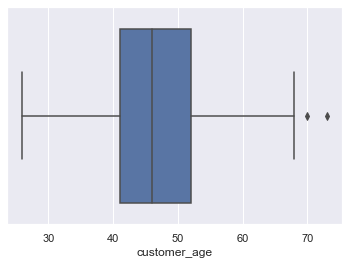

In [10]:
sns.boxplot(x=df_column_renamed["customer_age"])

### Dependent Count

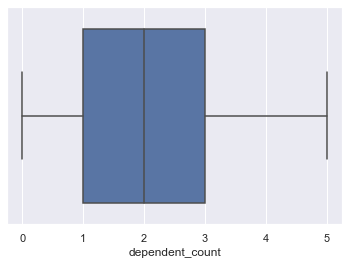

In [11]:
sns.boxplot(x=df_column_renamed["dependent_count"])

### Months on Book

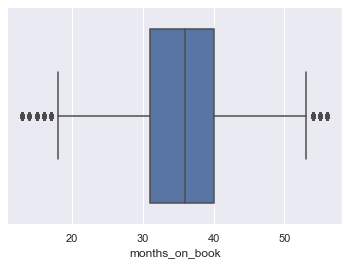

In [12]:
sns.boxplot(x=df_column_renamed["months_on_book"])

### Total Products Relationship

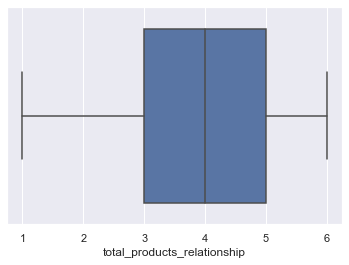

In [13]:
sns.boxplot(x=df_column_renamed["total_products_relationship"])

### Months Inactive

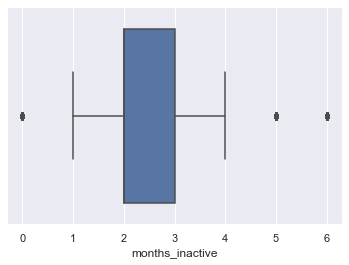

In [14]:
sns.boxplot(x=df_column_renamed["months_inactive"])

### Contacts Count

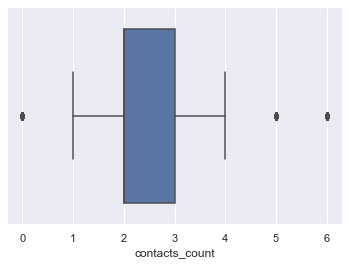

In [15]:
sns.boxplot(x=df_column_renamed["contacts_count"])

### Credit Limit

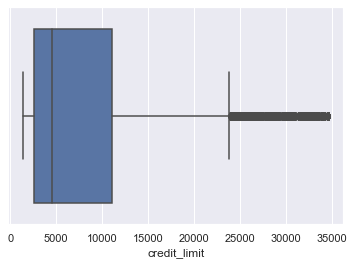

In [16]:
sns.boxplot(x=df_column_renamed["credit_limit"])

### Total Revolving Balance

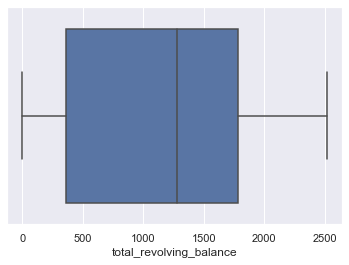

In [17]:
sns.boxplot(x=df_column_renamed["total_revolving_balance"])

### Average Open to Buy

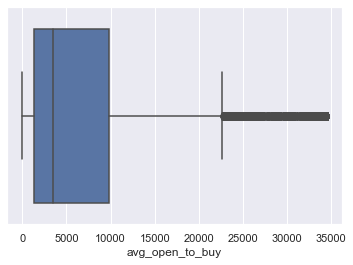

In [18]:
sns.boxplot(x=df_column_renamed["avg_open_to_buy"])

### Total Transaction Amount Change

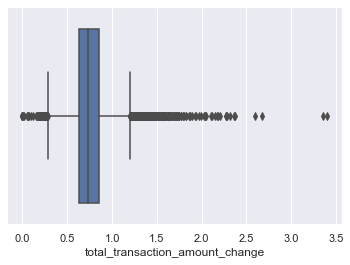

In [19]:
sns.boxplot(x=df_column_renamed["total_transaction_amount_change"])

### Total Transaction Amount

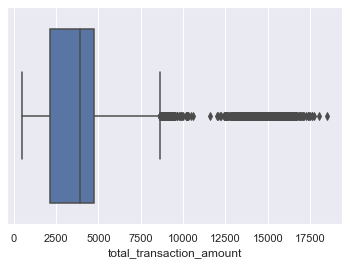

In [20]:
sns.boxplot(x=df_column_renamed["total_transaction_amount"])

### Total Transaction Count

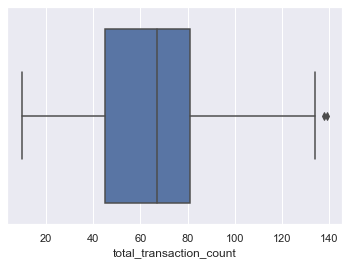

In [21]:
sns.boxplot(x=df_column_renamed["total_transaction_count"])

### Total Transaction Count Changes

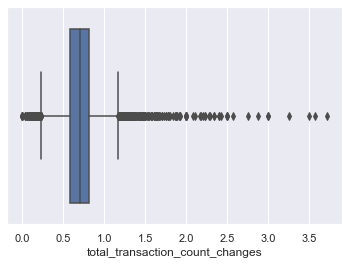

In [22]:
sns.boxplot(x=df_column_renamed["total_transaction_count_changes"])

### Average Utilization Ratio

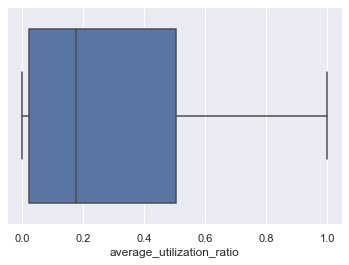

In [23]:
sns.boxplot(x=df_column_renamed["average_utilization_ratio"])

In [24]:
df_column_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   client_num                       10127 non-null  int64  
 1   attrition_flag                   10127 non-null  object 
 2   customer_age                     10127 non-null  int64  
 3   gender                           10127 non-null  object 
 4   dependent_count                  10127 non-null  int64  
 5   education_level                  10127 non-null  object 
 6   marital_status                   10127 non-null  object 
 7   income_category                  10127 non-null  object 
 8   card_category                    10127 non-null  object 
 9   months_on_book                   10127 non-null  int64  
 10  total_products_relationship      10127 non-null  int64  
 11  months_inactive                  10127 non-null  int64  
 12  contacts_count    

## Number of Outliers

In [25]:
# Remove Non-Numerical Variable
df_non_numerical_rmv = df_column_renamed.drop(['client_num','attrition_flag','gender','education_level','marital_status','marital_status','card_category'], axis = 1)

# Quartile calculations
Q1 = df_non_numerical_rmv.quantile(0.25)
Q3 = df_non_numerical_rmv.quantile(0.75)
IQR = Q3 - Q1

((df_non_numerical_rmv < (Q1 - 1.5 * IQR)) | (df_non_numerical_rmv > (Q3 + 1.5 * IQR))).sum()

average_utilization_ratio            0
avg_open_to_buy                    963
contacts_count                     629
credit_limit                       984
customer_age                         2
dependent_count                      0
income_category                      0
months_inactive                    331
months_on_book                     386
total_products_relationship          0
total_revolving_balance              0
total_transaction_amount           896
total_transaction_amount_change    395
total_transaction_count              2
total_transaction_count_changes    396
dtype: int64

# Removing Outliers use Quantile

### Customer Age

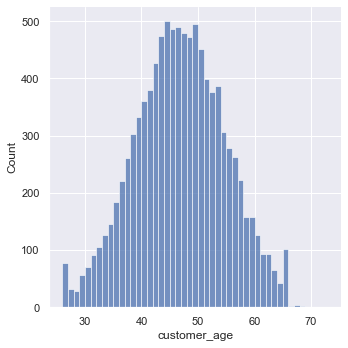

In [26]:
sns.displot(df_column_renamed["customer_age"])

In [27]:
q = df_column_renamed["customer_age"].quantile(0.99)
q

65.0

In [28]:
df_customer_age_outliers_rmv = df_column_renamed[df_column_renamed["customer_age"] < q]

C:\Users\yoela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


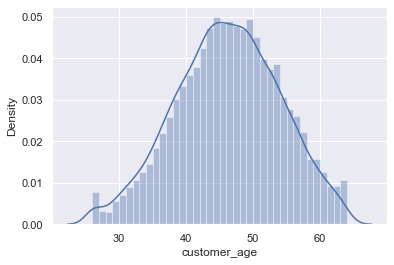

In [29]:
sns.distplot(df_customer_age_outliers_rmv["customer_age"])

### Months on Book 

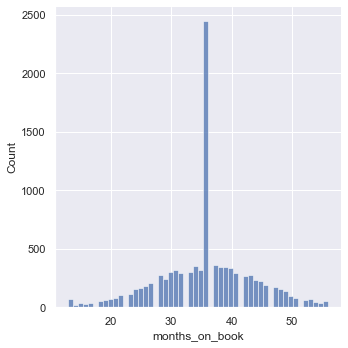

In [30]:
sns.displot(df_customer_age_outliers_rmv["months_on_book"])

In [31]:
q = df_customer_age_outliers_rmv["months_on_book"].quantile(0.99)
q

54.0

In [32]:
df_months_on_book_outliers_rmv = df_customer_age_outliers_rmv[df_customer_age_outliers_rmv["months_on_book"] < q]

C:\Users\yoela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


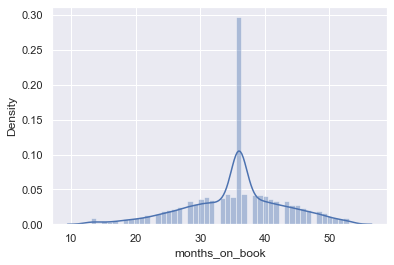

In [33]:
sns.distplot(df_months_on_book_outliers_rmv["months_on_book"])

### Credit Limit

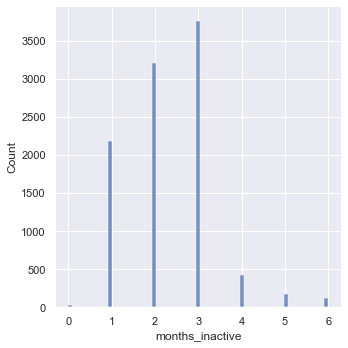

In [34]:
sns.displot(df_months_on_book_outliers_rmv["months_inactive"])

In [35]:
q = df_months_on_book_outliers_rmv["months_inactive"].quantile(0.99)
q

6.0

In [36]:
df_months_inactive_outliers_rmv = df_months_on_book_outliers_rmv[df_months_on_book_outliers_rmv["months_inactive"] < q]

C:\Users\yoela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


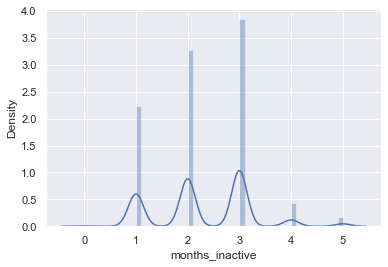

In [37]:
sns.distplot(df_months_inactive_outliers_rmv["months_inactive"])

###  Contacts Count

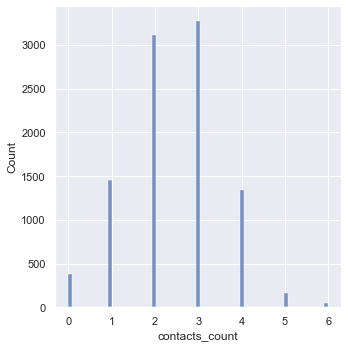

In [38]:
sns.displot(df_months_inactive_outliers_rmv["contacts_count"])

In [39]:
q = df_months_inactive_outliers_rmv["contacts_count"].quantile(0.99)
q

5.0

In [40]:
df_contacts_count_outliers_rmv = df_months_inactive_outliers_rmv[df_months_inactive_outliers_rmv["contacts_count"] < q]

C:\Users\yoela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


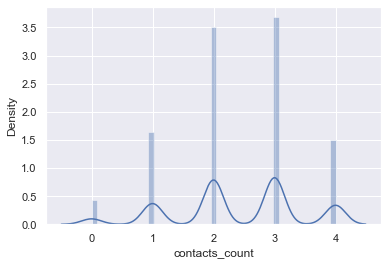

In [41]:
sns.distplot(df_contacts_count_outliers_rmv["contacts_count"])

### Credit Limit

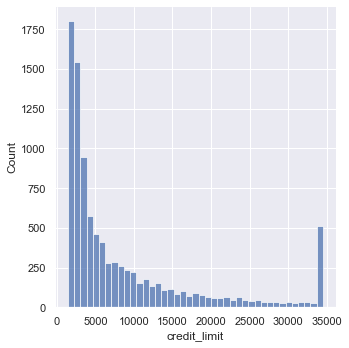

In [42]:
sns.displot(df_contacts_count_outliers_rmv["credit_limit"])

In [43]:
q = df_contacts_count_outliers_rmv["credit_limit"].quantile(0.95)
q

34516.0

In [44]:
df_credit_limit_outliers_rmv = df_contacts_count_outliers_rmv[df_contacts_count_outliers_rmv["credit_limit"] < q]

C:\Users\yoela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


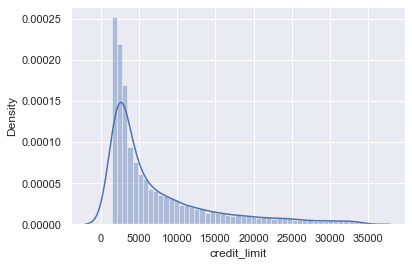

In [45]:
sns.distplot(df_credit_limit_outliers_rmv["credit_limit"])

### Average Open to Buy

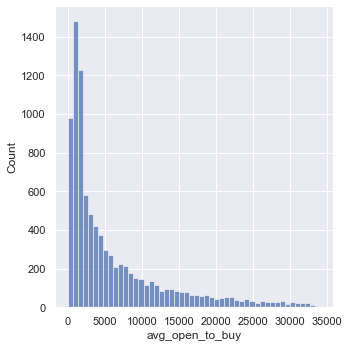

In [46]:
sns.displot(df_credit_limit_outliers_rmv["avg_open_to_buy"])

In [47]:
q = df_credit_limit_outliers_rmv["avg_open_to_buy"].quantile(0.95)
q

22418.199999999997

In [48]:
df_avg_open_to_buy_outliers_rmv = df_credit_limit_outliers_rmv[df_credit_limit_outliers_rmv["avg_open_to_buy"] < q]

C:\Users\yoela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


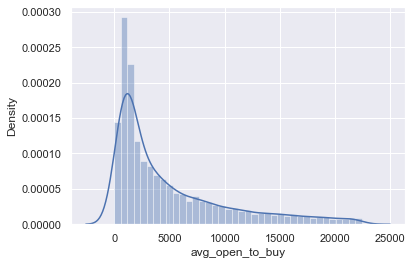

In [49]:
sns.distplot(df_avg_open_to_buy_outliers_rmv["avg_open_to_buy"])

### Total Transaction Amount Change

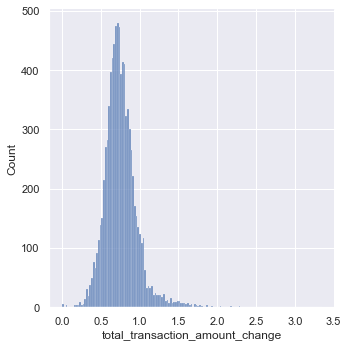

In [50]:
sns.displot(df_avg_open_to_buy_outliers_rmv["total_transaction_amount_change"])

In [51]:
q = df_avg_open_to_buy_outliers_rmv["total_transaction_amount_change"].quantile(0.96)
q

1.158

In [52]:
df_total_transaction_amount_change_outliers_rmv = df_avg_open_to_buy_outliers_rmv[df_avg_open_to_buy_outliers_rmv["total_transaction_amount_change"] < q]

C:\Users\yoela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


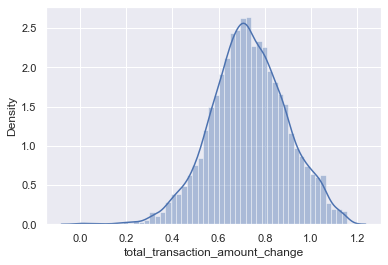

In [53]:
sns.distplot(df_total_transaction_amount_change_outliers_rmv["total_transaction_amount_change"])

### Total Transaction Amount

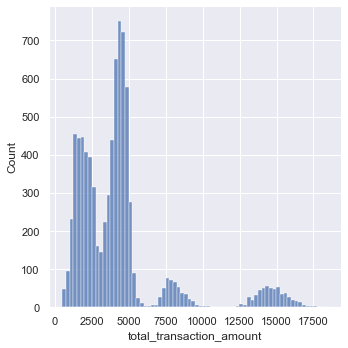

In [54]:
sns.displot(df_total_transaction_amount_change_outliers_rmv["total_transaction_amount"])

In [55]:
q = df_total_transaction_amount_change_outliers_rmv["total_transaction_amount"].quantile(0.95)
q

14053.75

In [56]:
df_total_transaction_amount_outliers_rmv = df_total_transaction_amount_change_outliers_rmv[df_total_transaction_amount_change_outliers_rmv["total_transaction_amount"] < q]

C:\Users\yoela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


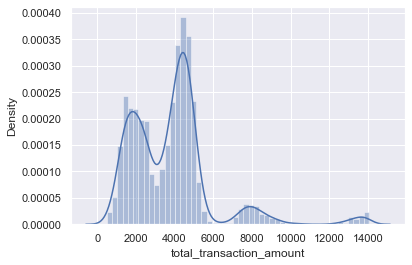

In [57]:
sns.distplot(df_total_transaction_amount_outliers_rmv["total_transaction_amount"])

### Total Transaction Count

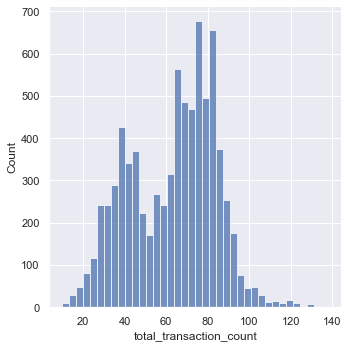

In [58]:
sns.displot(df_total_transaction_amount_outliers_rmv["total_transaction_count"])

In [59]:
q = df_total_transaction_amount_outliers_rmv["total_transaction_count"].quantile(0.99)
q

107.0

In [60]:
df_total_transaction_count_outliers_rmv = df_total_transaction_amount_outliers_rmv[df_total_transaction_amount_outliers_rmv["total_transaction_count"] < q]

C:\Users\yoela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


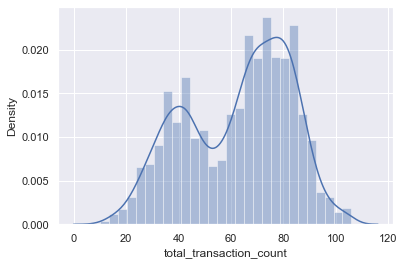

In [61]:
sns.distplot(df_total_transaction_count_outliers_rmv["total_transaction_count"])

### Total Transaction Count Changes

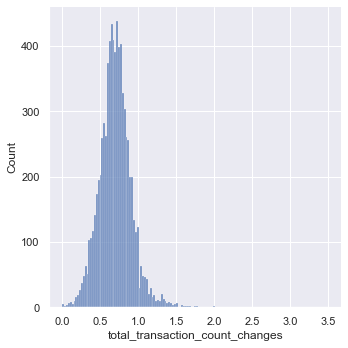

In [62]:
sns.displot(df_total_transaction_count_outliers_rmv["total_transaction_count_changes"])

In [63]:
q = df_total_transaction_count_outliers_rmv["total_transaction_count_changes"].quantile(0.98)
q

1.2

In [64]:
df_total_transaction_count_changes_outliers_rmv = df_total_transaction_count_outliers_rmv[df_total_transaction_count_outliers_rmv["total_transaction_count_changes"] < q]

C:\Users\yoela\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


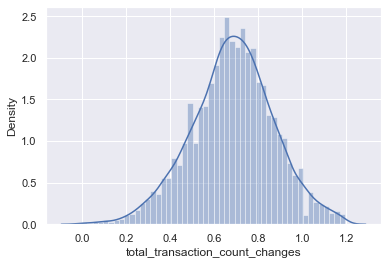

In [65]:
sns.distplot(df_total_transaction_count_changes_outliers_rmv["total_transaction_count_changes"])

# Pearson Correlation

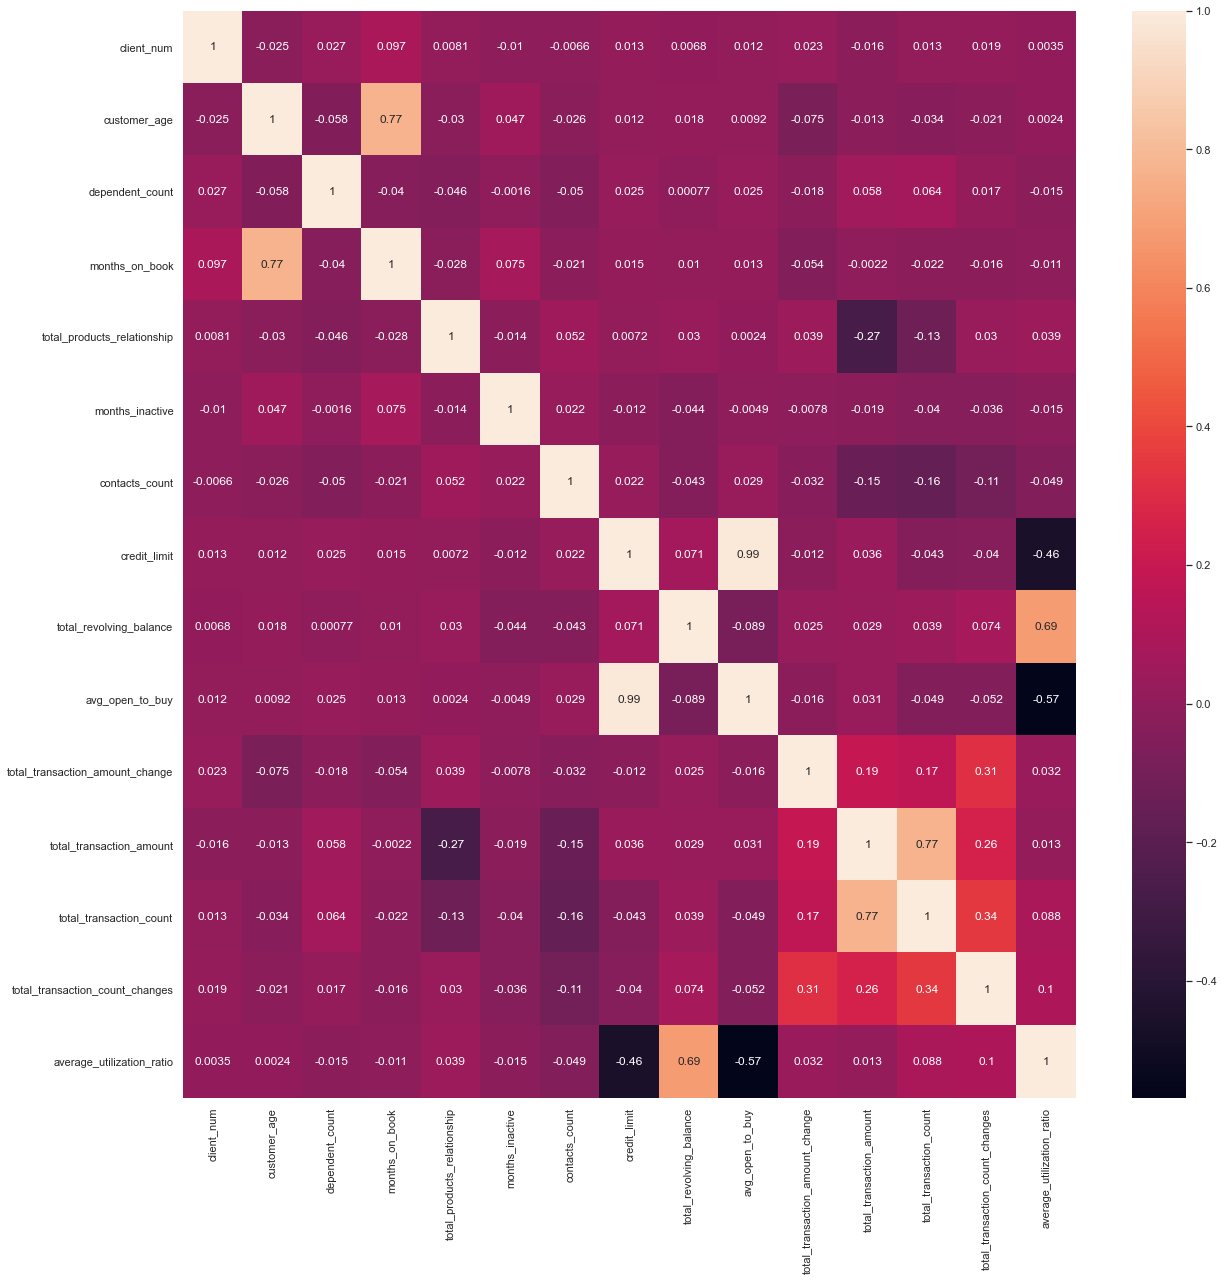

In [66]:
df_outl = df_total_transaction_count_changes_outliers_rmv
sns.set(rc={'figure.figsize':(20, 20)})
sns.heatmap(df_outl.corr(), annot=True)

### Analisis Statistik Deskriptif

In [72]:
df_total_transaction_count_changes_outliers_rmv.describe()

,client_num,customer_age,dependent_count,months_on_book,total_products_relationship,months_inactive,contacts_count,credit_limit,total_revolving_balance,avg_open_to_buy,total_transaction_amount_change,total_transaction_amount,total_transaction_count,total_transaction_count_changes,average_utilization_ratio
count,7.607000e+03,7607.000000,7607.000000,7607.000000,7607.000000,7607.000000,7607.000000,7607.000000,7607.000000,7607.000000,7607.000000,7607.000000,7607.000000,7607.000000,7607.000000
mean,7.385953e+08,45.991455,2.381096,35.561588,3.908768,2.314316,2.398843,5925.179361,1136.387932,4788.791429,0.727057,3741.363744,63.010648,0.683967,0.304604
std,3.650566e+07,7.627197,1.279308,7.525161,1.526895,0.935430,1.034630,5135.370652,818.599256,5142.711891,0.166214,1973.931384,20.039129,0.188188,0.282609
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.129883e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2343.500000,0.000000,1086.000000,0.620000,2179.000000,45.000000,0.567000,0.000000
50%,7.178121e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,3624.000000,1247.000000,2564.000000,0.722000,3911.000000,67.000000,0.688000,0.226000
75%,7.724513e+08,51.000000,3.000000,40.000000,5.000000,3.000000,3.000000,7968.000000,1761.500000,6833.500000,0.838000,4618.500000,79.000000,0.806000,0.551000
max,8.283431e+08,64.000000,5.000000,53.000000,6.000000,5.000000,4.000000,24542.000000,2517.000000,22411.000000,1.156000,14023.000000,106.000000,1.194000,0.999000


In [73]:
df_total_transaction_count_changes_outliers_rmv[[
    'attrition_flag','gender','education_level','marital_status','income_category',
    'card_category']].describe()

,attrition_flag,gender,education_level,marital_status,income_category,card_category
count,7607,7607,7607,7607,7607,7607
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,6300,4516,2352,3471,3012,7413
